In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%run init.py

Setting up variables & DB connection for experiment:

*******************
25similar
*******************

Snorkel session connected to:  postgres:///snorkel25similar


/home/antonis/anaconda2/envs/snorkel27clone/lib/python2.7/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [3]:
# Rebuild text
from sklearn_bridge import recreate_text_representation, candidate_dict_to_df
import sklearn, pickle, time, seaborn
import pandas as pd
from itertools import product

In [4]:
from MLutils import report_to_df, train_evaluate, diversity_heatmap

In [7]:
import pickle
with open(path_candidate_dict_pkl, 'rb') as f:
    candidate_dict = pickle.load(f)

for splt in candidate_dict.keys():
    print "Split = %i : imported %i candidates" %(splt, len(candidate_dict[splt].keys()))

Split = 0 : imported 13007 candidates
Split = 1 : imported 3242 candidates
Split = 2 : imported 8221 candidates
Split = 3 : imported 130424 candidates


In [8]:
# Decide on text representation
trim_text = True
trim_window = 5
use_lemmas = True

df_train = candidate_dict_to_df(candidate_dict[0],trim_text=trim_text, window=trim_window, lemmas = use_lemmas )
df_val = candidate_dict_to_df(candidate_dict[1],trim_text=trim_text, window=trim_window, lemmas = use_lemmas )
df_test = candidate_dict_to_df(candidate_dict[2],trim_text=trim_text, window=trim_window, lemmas = use_lemmas )

df_unlab = candidate_dict_to_df(candidate_dict[3],trim_text=trim_text, window=trim_window, lemmas = use_lemmas )


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD


In [10]:
text_vectorizer = TfidfVectorizer(ngram_range=[0,3])

In [11]:
X_train = text_vectorizer.fit_transform(df_train.text)
y_train = df_train.label

X_val = text_vectorizer.transform(df_val.text)
y_val = df_val.label

X_test = text_vectorizer.transform(df_test.text)
y_test = df_test.label

# X_unlab = text_vectorizer.transform(df_unlab_sim.text)
# # X_unlab = svd.transform(X_unlab)



In [13]:
from sklearn.model_selection import validation_curve
from sklearn.ensemble import AdaBoostClassifier
from sklearn.utils import shuffle

In [14]:
X_train,y_train = shuffle(X_train,y_train, random_state=0)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, mean_squared_error


# Boosting

## AdaBoost -- to delete

** Decision Trees **

In [18]:
# # estimators = range(50,351,150)
# estimators = [1,5,25]+range(50,701,50)

# f1_scores_df = pd.DataFrame(index=estimators)
# mse_scores_df = pd.DataFrame(index=estimators)


# for n in estimators:
#     clf = AdaBoostClassifier(n_estimators=n )
#     clf.fit(X_train,y_train)
    
#     pred = clf.predict(X_train)
#     f1_scores_df.loc[n,'f1_train'] = f1_score(y_train,pred)
#     mse_scores_df.loc[n,'MSE_train'] = mean_squared_error(y_train,pred)
    
    
#     pred = clf.predict(X_val)
#     f1_scores_df.loc[n,'f1_val'] = f1_score(y_val,pred)
#     mse_scores_df.loc[n,'MSE_val'] = mean_squared_error(y_val,pred)
    
# #     scores_df['train_score'] = clf.score(X_train,y_train)



# # scores = validation_curve(clf, X_train, y_train,
# #                          'n_estimators', estimators)


In [19]:
# # that was without probabilities
# mse_scores_df.plot(title='AdaBoost MSE error (base estimator = DecisionTrees)')

In [20]:
# # that was without probabilities
# f1_scores_df.plot(title='AdaBoost F1 score (base estimator = DecisionTrees)')

In [21]:
# f1_scores_df

## My learning curve function

In [26]:
# X_train

In [27]:
# X_val

In [28]:
# Perform training 

In [36]:
# X_train

In [30]:
### Try with my own loop

In [37]:
# shuffle(X_train,y_train)

In [32]:
# train_sizes = np.array([ 0.1, 0.33, 0.55, 0.78, 1. ])

In [33]:
# train_sizes[0]=0

In [34]:
# train_sizes

In [35]:
# train_sizes

## Write learning_curve function

In [14]:
##     TODO:  first undersample

In [38]:
from MLutils import balance_candidates

In [41]:
from imblearn.under_sampling import  RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train,y_train = rus.fit_sample(X_train,y_train)

In [48]:
from scipy.sparse import csr_matrix,vstack
import numpy as np
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.utils import shuffle
from copy import deepcopy

** Given X_train, y_train (full training set to perform incremental splits)
and optionally X_init, y_init (to start the initial validation curve from that point onwards) **

In [49]:
from sklearn.metrics import mean_squared_error, make_scorer,f1_score, precision_recall_fscore_support
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
f1_scorer = make_scorer(f1_score, greater_is_better=True)

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
### define function inputs  ###

clf = LogisticRegression()
cv_splits = 3 # for cross-validating and finding variance in VALIDATION set
# X_init: the training dataset on beginning of the learning curve (spot 0)
# X_increm: the additional examples for plotting incremental learning curves

## construct dummy dataset
splt_sizes = np.array([ 0.1, 0.33, 0.55, 0.78, 1.])

X_init, y_init = rus.fit_sample(X_train, y_train)
X_increm, y_increm = rus.fit_sample(X_test, y_test)

print 'X_init', X_init.shape, len(y_init)
print 'X_increm', X_increm.shape, len(y_increm)


X_init (6576, 77657) 6576
X_increm (3968, 77657) 3968


In [58]:
from MLutils import neg_to_bin_labels

In [232]:
from sklearn.model_selection import KFold
# function

# definitions:
# X_splt: subset of the training dataset
# X_merged: X_init + X_splt | full training dataset to perform training on that iteration

def custom_learning_curve(clf, X_increm, y_increm, X_val, y_val, 
                          X_init = None, y_init=None,
                          X_test=None, y_test=None, cv_splits=3, ):
    """Custom function for returning learning curve scores of different classifiers. 
    Learning curve starts from initial training set (X_init) making sure it is always
    included in the training process and then samples incrementally over X_increm.
    Evaluates loss & F1 on X_val, y_val and (optionally) returns P,R,F1 on test set (X_test)
    
    clf: estimator,implementing 'fit/train' and 'predict/predictions' methods
    X_init: the training dataset on beginning of the learning curve (spot 0)
    X_increm: the additional examples for plotting incremental learning curves
    
    returns: train_sizes, train_mse, train_f1, valid_mse , valid_f1 , (P, R, F1) @ test set
    """
    
    #init
    train_mse = np.empty((0,1), float)
    train_f1 = np.empty((0,1), float)
    valid_mse = np.empty((0,cv_splits), float)
    valid_f1 = np.empty((0,cv_splits), float)
    #shuffle 
    X_increm, y_increm = shuffle(X_increm, y_increm)
    
    
    y_init,y_increm = np.array(neg_to_bin_labels(y_init)), np.array(neg_to_bin_labels(y_increm)) #ensure labels are {0,1}
    y_val, y_test = np.array(neg_to_bin_labels(y_val)) , np.array(neg_to_bin_labels(y_test))
    
    kf = KFold(n_splits=3, random_state=42, shuffle=True) # KFold splitter for CV in valid set
    
    if X_init is not None:
        X_init, y_init = shuffle(X_init, y_init)
        if y_init is None:
            raise ValueError("Must also pass labels for the initial training set")
        splt_sizes[0] = 0  # force training to start from ONLY gold set
        train_sizes = len(y_init)+(splt_sizes)*len(y_increm)

    for splt_size in splt_sizes:
        if splt_size == 1: #hack because sklearn complains if test size == 0
            leave_out_size = 2
        elif splt_size ==0:
            leave_out_size = len(y_increm) - 2
        else:
            leave_out_size = 1.-splt_size

        # Get a sample out of the 'increm' training set
        X_splt, _, y_splt, _ = train_test_split(X_increm, y_increm, test_size = leave_out_size, 
                                                      shuffle = True, 
                                                      stratify = y_increm, 
                                                      random_state=42)
        if X_init!=None: #augment X_init with X_splt
            X_merged = vstack((X_init, X_splt))
            y_merged = np.concatenate((y_init,y_splt))
        else: #perform training only with X_merged 
            X_merged = deepcopy(X_splt), deepcopy(y_splt) 

        # and shuffle
        X_merged,y_merged = shuffle(X_merged,y_merged, random_state=42)

        # training
        try:
            clf.fit(X_merged,y_merged)
            print "Training X_merged with shape",X_merged.shape
        except:
            clf.train(X_merged,y_merged) # TODO: add fit_params?
        
        # calc training errors
        try:
            pred = clf.predict(X_merged)
        except:
            pred = clf.predictions(X_merged)
        print 'F1 of train set',f1_score(y_merged,pred)
        
        train_mse = np.vstack([train_mse, -mean_squared_error(y_merged,pred)])
        train_f1 = np.vstack([train_f1, f1_score(y_merged,pred)])
#         train_mse.append(-mean_squared_error(y_merged,pred))
#         f1_train.append(f1_score(y_merged,pred))
        
        
        #compute CV sets on validation to plot variance too
        
        mse,f1 = [],[]
        for train_index, test_index in kf.split(X_val):
            X, y = X_val[test_index], y_val[test_index]
            pred = clf.predict(X)
            print X.shape
            mse.append(-mean_squared_error(y,pred))
            f1.append(f1_score(y,pred))
        mse = np.array(mse)
        f1 = np.array(f1) 
        print mse
        valid_mse = np.vstack([valid_mse, mse])
        valid_f1 = np.vstack([valid_f1, f1])


        #compute PRF on test set
        if X_test!=None:
            try:
                pred = clf.predict(X_test)
            except:
                pred = clf.predictions(X_test)
            print np.unique(pred), np.unique(y_test)
            p,r,f1,_ = precision_recall_fscore_support(y_test, pred, average = 'binary')
            test_prf1 = (p,r,f1)
        else:
            test_prf1 = (None,None,None)
        
        #ensure that runs ok
        print 'Curve @ %s : \n%s\n\n'%(X_merged.shape, valid_f1)


    # return train_sizes, train_scores, valid_scores, test_prf1 = 
    train_sizes = [int(i) for i in train_sizes]
#     train_mse = np.array(train_mse).reshape((-1,1))
#     train_f1 = np.array(train_f1).reshape((-1,1))
    
    try:
        print "Completed %s training in %.2f sec"%( clf.__class__ , time.time() - st_time)
    except:
        pass
    return train_sizes, train_mse, train_f1, valid_mse , valid_f1 , test_prf1

In [239]:
test_prf1

(0.66504854368932043,
 0.55241935483870963,
 0.6035242290748899,
 0.66504854368932043,
 0.55241935483870963,
 0.6035242290748899,
 0.66504854368932043,
 0.55241935483870963,
 0.6035242290748899,
 0.66504854368932043,
 0.55241935483870963,
 0.6035242290748899,
 0.66504854368932043,
 0.55241935483870963,
 0.6035242290748899,
 0.66504854368932043,
 0.55241935483870963,
 0.6035242290748899,
 0.66504854368932043,
 0.55241935483870963,
 0.6035242290748899,
 0.66504854368932043,
 0.55241935483870963,
 0.6035242290748899,
 0.66504854368932043,
 0.55241935483870963,
 0.6035242290748899,
 0.66504854368932043,
 0.55241935483870963,
 0.6035242290748899,
 0.66504854368932043,
 0.55241935483870963,
 0.6035242290748899,
 0.66504854368932043,
 0.55241935483870963,
 0.6035242290748899,
 0.66504854368932043,
 0.55241935483870963,
 0.6035242290748899,
 0.66504854368932043,
 0.55241935483870963,
 0.6035242290748899,
 0.66504854368932043,
 0.55241935483870963,
 0.6035242290748899,
 0.66504854368932043,
 0.

Training X_merged with shape (502, 77657)
F1 of train set 0.965811965812
(1081, 77657)
(1081, 77657)
(1080, 77657)
[-0.22386679 -0.22294172 -0.20833333]
[0 1] [0 1]
Curve @ (502, 77657) : 
[[ 0.42654028  0.42755344  0.43037975]]


Training X_merged with shape (2505, 77657)
F1 of train set 0.957949539447
(1081, 77657)
(1081, 77657)
(1080, 77657)
[-0.19241443 -0.18501388 -0.18425926]
[0 1] [0 1]
Curve @ (2505, 77657) : 
[[ 0.42654028  0.42755344  0.43037975]
 [ 0.56485356  0.57627119  0.55679287]]


Training X_merged with shape (3841, 77657)
F1 of train set 0.948784273151
(1081, 77657)
(1081, 77657)
(1080, 77657)
[-0.17576318 -0.1720629  -0.16851852]
[0 1] [0 1]
Curve @ (3841, 77657) : 
[[ 0.42654028  0.42755344  0.43037975]
 [ 0.56485356  0.57627119  0.55679287]
 [ 0.5814978   0.59210526  0.57075472]]


Training X_merged with shape (5239, 77657)
F1 of train set 0.944938505203
(1081, 77657)
(1081, 77657)
(1080, 77657)
[-0.17576318 -0.16743756 -0.16574074]
[0 1] [0 1]
Curve @ (5239, 77657

<module 'matplotlib.pyplot' from '/home/antonis/anaconda2/envs/snorkel27clone/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

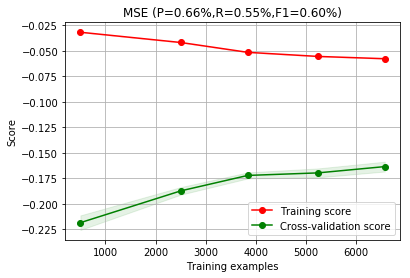

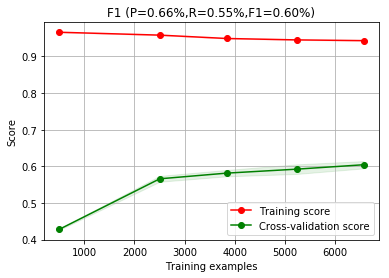

In [240]:
train_sizes, train_mse, train_f1, valid_mse , valid_f1 , test_prf1 = custom_learning_curve(
    LogisticRegression(), X_train[500:],y_train[500:], X_val, y_val, X_init= X_train[:500], y_init=y_train[:500],
                      X_test = X_test, y_test = y_test
                     )

plot_learning_curve(train_mse,valid_mse,train_sizes, 'MSE (P=%.2f%%,R=%.2f%%,F1=%.2f%%)'%(test_prf1))

plot_learning_curve(train_f1,valid_f1,train_sizes, title='F1 (P=%.2f%%,R=%.2f%%,F1=%.2f%%)'%(test_prf1))


In [234]:
test_prf1

(0.66444174757281549, 0.55191532258064513, 0.60297356828193827)

In [203]:
from sklearn.model_selection import learning_curve

In [209]:
X_train, y_train = shuffle(X_train,y_train)

In [220]:
train_sizes_abs, train_scores, test_scores = learning_curve(
    LogisticRegression(),
    X_train, y_train, 
    scoring = mse_scorer
)


In [221]:
train_sizes_abs

array([ 438, 1424, 2411, 3397, 4384])

In [222]:
train_scores

array([[-0.02739726, -0.0913242 , -0.0913242 ],
       [-0.11516854, -0.11235955, -0.11235955],
       [-0.17917876, -0.13936126, -0.15429282],
       [-0.22019429, -0.19546659, -0.184869  ],
       [-0.23722628, -0.21441606, -0.19616788]])

In [226]:
np.mean(train_scores, axis=1)

array([-0.07001522, -0.11329588, -0.15761095, -0.20017663, -0.21593674])

<module 'matplotlib.pyplot' from '/home/antonis/anaconda2/envs/snorkel27clone/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

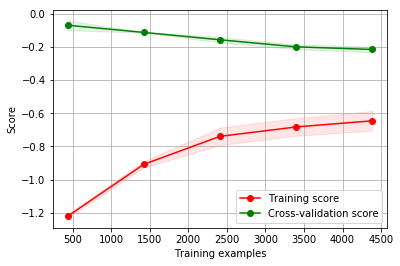

In [227]:
plot_learning_curve(test_scores, train_scores, train_sizes_abs)

In [190]:
train_sizes

[1000, 2840, 4066, 5349, 6576]

In [185]:
train_mse

array([[-0.1093275 ],
       [-0.09710326],
       [-0.09047901],
       [-0.08456929],
       [-0.08273065]])

In [162]:
train_f1

array([[ 0.71879887],
       [ 0.81435143],
       [ 0.8458771 ],
       [ 0.86775214],
       [ 0.87786869]])

In [163]:
valid_mse

array([[-0.16188714, -0.17113784, -0.17592593],
       [-0.15726179, -0.160037  , -0.15833333],
       [-0.15448659, -0.15633673, -0.15462963],
       [-0.15078631, -0.15911193, -0.14537037],
       [-0.14616096, -0.15356152, -0.15092593]])

In [164]:
valid_f1

array([[ 0.48377581,  0.43425076,  0.39102564],
       [ 0.55026455,  0.53116531,  0.51558074],
       [ 0.56847545,  0.56777494,  0.54495913],
       [ 0.5914787 ,  0.5678392 ,  0.57908847],
       [ 0.6127451 ,  0.58706468,  0.56992084]])

In [165]:
test_prf1

(array([ 0.91092512,  0.90718954]),
 array([ 0.97723264,  0.69959677]),
 array([ 0.9429146 ,  0.78998293]))

In [166]:
from MLutils import plot_learning_curve

In [169]:
test_prf1

(array([ 0.91092512,  0.90718954]),
 array([ 0.97723264,  0.69959677]),
 array([ 0.9429146 ,  0.78998293]))

In [63]:
clf.__class__

sklearn.linear_model.logistic.LogisticRegression

In [110]:
a = np.array(mse_train).reshape((-1,1))

In [104]:
valid_mse

array([[-0.74745606, -0.71415356, -0.75925926],
       [-0.74745606, -0.71415356, -0.75925926],
       [-0.74745606, -0.71415356, -0.75925926],
       [-0.74745606, -0.71415356, -0.75925926],
       [-0.74745606, -0.71415356, -0.75925926]])

In [107]:
clf_name = str(clf.__class__).split('.')[-1].split("'")[0]

In [118]:
print p,r,f1

[ 0.80242567  0.84810127] [ 0.98653199  0.23639113] [ 0.88500539  0.36972803]


## Plot learning curves

In [66]:
from learning_curves import learning_curve

In [33]:
from scipy.sparse import vstack
import numpy as np

In [34]:
X_all = vstack((X_train,X_val) )
y_all = (y_train.append(y_val)).values
X_all_split = np.array([0 for i in enumerate(X_train)] + [1 for i in enumerate(X_val)])

In [43]:
X_train

<13007x77657 sparse matrix of type '<type 'numpy.float64'>'
	with 646601 stored elements in Compressed Sparse Row format>

In [36]:
X_all_split.shape

(16249,)

In [64]:
from sklearn.metrics import mean_squared_error, make_scorer,f1_score


In [65]:
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
f1_scorer = make_scorer(f1_score, greater_is_better=True)


In [66]:
train_sizes, train_scores, valid_scores = learning_curve(
    AdaBoostClassifier(n_estimators=75),
    X_all, y_all, 
    #train_sizes=range(1000, X_train.shape[0], 1000), 
    groups = X_all_split,
    scoring = mse_scorer
)


In [67]:
train_scores

array([[-0.41366574, -0.33979686, -0.33979686],
       [-0.59772727, -0.56931818, -0.56931818],
       [-0.63521907, -0.62581836, -0.63857646],
       [-0.64665237, -0.6285442 , -0.63092685],
       [-0.63995569, -0.64069424, -0.64401773]])

In [68]:
valid_scores

array([[-0.8669005 , -0.86616208, -0.90858726],
       [-0.76056858, -0.79527414, -0.80590951],
       [-0.6741739 , -0.76352224, -0.76306556],
       [-0.73620085, -0.73103194, -0.74607572],
       [-0.71847886, -0.73472402, -0.69953832]])

In [69]:
train_sizes

array([ 1083,  3520,  5957,  8394, 10832])

In [95]:
from MLutils import plot_learning_curve

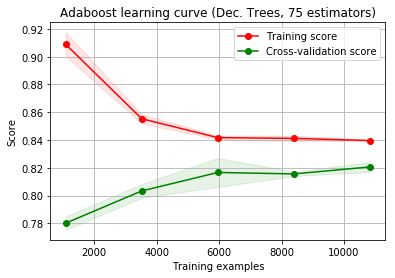

In [61]:
plot_learning_curve(train_scores, 
                        valid_scores,
                        train_sizes=train_sizes,
                   title = 'Adaboost learning curve (Dec. Trees, 75 estimators)')

plt.show()

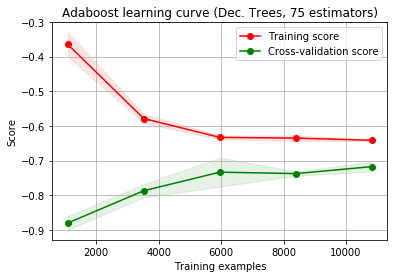

In [70]:
plot_learning_curve(train_scores, 
                        valid_scores,
                        train_sizes=train_sizes,
                   title = 'Adaboost learning curve (Dec. Trees, 75 estimators)')

plt.show()

In [71]:
## F1 score

In [72]:
train_sizes, train_scores, valid_scores = learning_curve(
    AdaBoostClassifier(n_estimators=75 ),
    X_all, y_all, 
    #train_sizes=range(1000, X_train.shape[0], 1000), 
    groups = X_all_split,
    scoring = f1_scorer
)


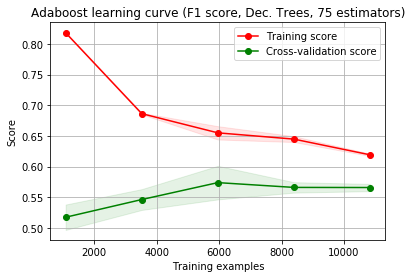

In [74]:
plot_learning_curve(train_scores, 
                        valid_scores,
                        train_sizes=train_sizes,
                   title = 'Adaboost learning curve (F1 score, Dec. Trees, 75 estimators)')

plt.show()

** With Linear SVC **

In [88]:
from sklearn.svm import SVC

In [75]:
# estimators = range(50,351,150)
estimators = [1,5,25] #+range(50,351,25)

scores_df = pd.DataFrame(index=estimators)



for n in estimators:
    clf = AdaBoostClassifier(n_estimators=n, 
                             base_estimator = LinearSVC,
                             algorithm='SAMME'
                            )
    clf.fit(X_train,y_train)
    
    pred = clf.predict(X_train)
    scores_df.loc[n,'f1_train'] = f1_score(y_train,pred)
    pred = clf.predict(X_val)
    scores_df.loc[n,'f1_val'] = f1_score(y_val,pred)
#     scores_df['train_score'] = clf.score(X_train,y_train)



# scores = validation_curve(clf, X_train, y_train,
#                          'n_estimators', estimators)


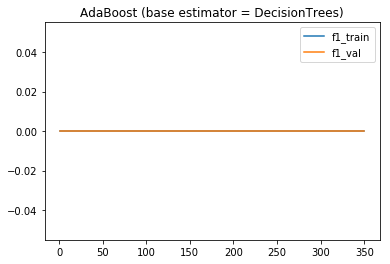

In [83]:
scores_df.plot(title='AdaBoost (base estimator = LR)')

## BrownBoost

In [79]:
from MLutils import BrownBoost

In [80]:
from sklearn.tree import DecisionTreeClassifier

In [81]:
# prediction = brownboost.predict(X_test)
# accuracy = accuracy_score(y_test, prediction)
# precision = precision_score(y_test, prediction, pos_label=1, labels=[-1, 1])
# recall = recall_score(y_test, prediction, pos_label=1, labels=[-1, 1])
# clf_f1_score = f1_score(y_test, prediction, pos_label=1, labels=[-1, 1])
# print("mean accuracy : %.4f \n" % accuracy)
# precision, recall, clf_f1_score

In [110]:
base_estimator = DecisionTreeClassifier(max_depth=1)
brownboost = BrownBoost(base_estimator, c=1)
st_time = time.time()

brownboost.fit(X_train, np.array(y_train))
pred = brownboost.predict(X_train)
f1_train = f1_score(y_train,pred)
pred = brownboost.predict(X_val)
f1_val = f1_score(y_val,pred)
print f1_train,f1_val
print time.time()-st_time

0.724848915748 0.573268921095
808.138631821


In [76]:
## BrownBoost learning curves

In [77]:
import time

In [93]:
from MLutils import BrownBoost

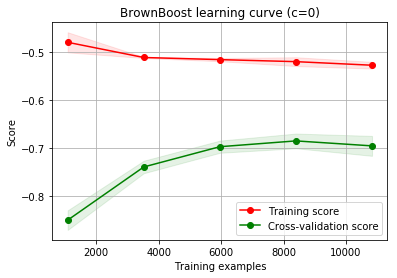

5793.73460007


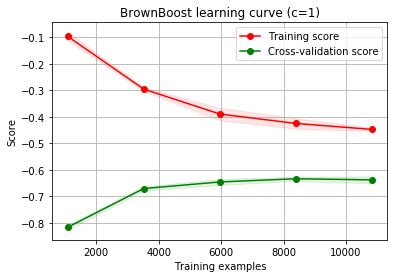

8870.76387811


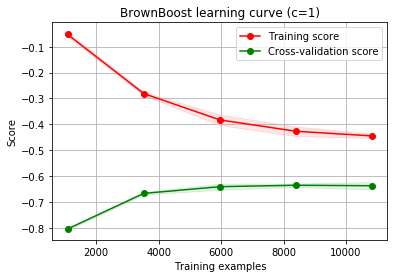

8856.51826715


In [113]:
#define BrownBoost hyperparams

for c in [.5,1,1.5]:

    base_estimator = DecisionTreeClassifier(max_depth=1)

    st_time = time.time()
    train_sizes, train_scores, valid_scores = learning_curve(
        BrownBoost(base_estimator, c=c) ,
        X_all, y_all, 
        #train_sizes=range(1000, X_train.shape[0], 1000), 
        groups = X_all_split,
        scoring = mse_scorer,
        n_jobs = -1

    )

    plot_learning_curve(train_scores, 
                            valid_scores,
                            train_sizes=train_sizes,
                       title = 'BrownBoost learning curve (c=%.2f)'%c)

    plt.show()
    print time.time()-st_time

## RobustBoost

In [113]:
from MLutils import RobustBoost

In [114]:
from sklearn.tree import DecisionTreeClassifier

In [117]:
base_estimator = DecisionTreeClassifier(max_depth=1)
robustboost = RobustBoost(base_estimator)

In [118]:
# prediction = brownboost.predict(X_test)
# accuracy = accuracy_score(y_test, prediction)
# precision = precision_score(y_test, prediction, pos_label=1, labels=[-1, 1])
# recall = recall_score(y_test, prediction, pos_label=1, labels=[-1, 1])
# clf_f1_score = f1_score(y_test, prediction, pos_label=1, labels=[-1, 1])
# print("mean accuracy : %.4f \n" % accuracy)
# precision, recall, clf_f1_score

In [119]:
# robustboost.fit(X_train, np.array(y_train))
# pred = robustboost.predict(X_train)
# f1_train = f1_score(y_train,pred)
# pred = robustboost.predict(X_val)
# f1_val = f1_score(y_val,pred)
# print f1_train,f1_val

NameError: global name 't' is not defined